In [2]:
import tensorflow as tf

In [3]:
mnist = tf.keras.datasets.mnist


In [4]:
print(mnist)

<module 'tensorflow._api.v1.keras.datasets.mnist' from '/home/aditya/anaconda3/envs/dlenv/lib/python3.6/site-packages/tensorflow/_api/v1/keras/datasets/mnist/__init__.py'>


In [5]:
(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0


y_train = tf.keras.utils.to_categorical(y_train,10)
y_test = tf.keras.utils.to_categorical(y_test,10)


In [6]:
import matplotlib.pyplot as plt
fig = plt.figure()
for i in range(3):
  plt.subplot(3,3,i+1)
  plt.tight_layout()
  plt.imshow(x_train[i], cmap='gray', interpolation='none')
  plt.title("Digit: {}".format(y_train[i]))
  plt.xticks([])
  plt.yticks([])
fig

<Figure size 640x480 with 3 Axes>

In [7]:
print(len(x_train))
print(len(y_train))

60000
60000


In [8]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train/=255
x_test/=255


In [9]:
# model = tf.keras.models.Sequential([
#   tf.keras.layers.Flatten(input_shape=(28, 28)),
#   tf.keras.layers.Dense(512, activation=tf.nn.relu),
#   tf.keras.layers.Dropout(0.2),
#   tf.keras.layers.Dense(10, activation=tf.nn.softmax)
# ])

model = tf.keras.Sequential()
# model.add(tf.keras.layers.Flatten(input_shape=(28,28)))
model.add(tf.keras.layers.Conv2D(filters=6,kernel_size=(6,6),padding='same', activation ='relu',input_shape = (28,28,1)))
model.add(tf.keras.layers.Conv2D(filters=12,kernel_size=(5,5),strides=(2, 2),padding='same', activation ='relu'))
model.add(tf.keras.layers.Conv2D(filters=24,kernel_size=(4,4),strides=(2, 2),padding='same', activation ='relu'))

# model.add(tf.keras.layers.BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001, center=True, scale=True, beta_initializer='zeros', gamma_initializer='ones', moving_mean_initializer='zeros', moving_variance_initializer='ones', beta_regularizer=None, gamma_regularizer=None, beta_constraint=None, gamma_constraint=None))
# model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2),strides=2))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(100,activation ='relu'))
# model.add(tf.keras.layers.Dropout(0.25))
model.add(tf.keras.layers.Dense(10, activation ="softmax"))

In [10]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [11]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 6)         222       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 12)        1812      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 24)          4632      
_________________________________________________________________
flatten (Flatten)            (None, 1176)              0         
_________________________________________________________________
dense (Dense)                (None, 100)               117700    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1010      
Total params: 125,376
Trainable params: 125,376
Non-trainable params: 0
_________________________________________________________________


In [12]:
history = model.fit(x_train, y_train,validation_split=0.05, epochs=5)
model.evaluate(x_test, y_test)


Train on 57000 samples, validate on 3000 samples
Epoch 1/5
57000/57000 [==============================] - 24s 422us/step - loss: 0.4910 - acc: 0.8381 - val_loss: 0.1241 - val_acc: 0.9667
Epoch 2/5
57000/57000 [==============================] - 29s 506us/step - loss: 0.1486 - acc: 0.9544 - val_loss: 0.0922 - val_acc: 0.9727
Epoch 3/5
57000/57000 [==============================] - 28s 489us/step - loss: 0.1019 - acc: 0.9689 - val_loss: 0.0769 - val_acc: 0.9807
Epoch 4/5
57000/57000 [==============================] - 28s 494us/step - loss: 0.0793 - acc: 0.9754 - val_loss: 0.0634 - val_acc: 0.9833
Epoch 5/5
10000/10000 [==============================] - 1s 115us/step


[0.0794615312570706, 0.9748]



dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


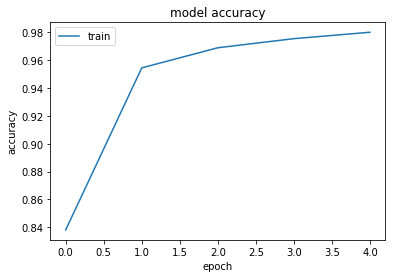

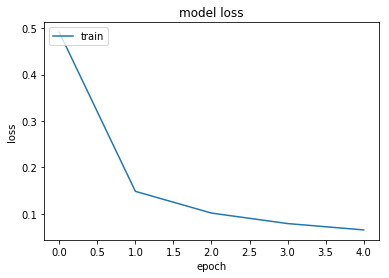

In [13]:


# plot learning curves

print("\n")
print(history.history.keys())

# summarize history for accuracy
plt.plot(history.history['acc'])
# plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
# plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

1


/home/aditya/anaconda3/envs/dlenv/lib/python3.6/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in true_divide


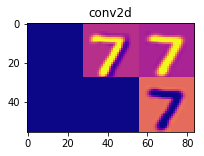

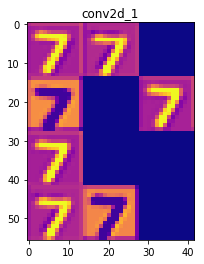

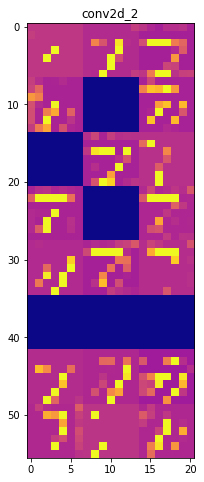

In [17]:
########Getting outputs for intermediate convolution layers by running prediction on test image ##########
import numpy as np
# print(model.layers)
# layer_outputs = [layer.output for layer in model.layers]
# print(layer_outputs)

import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
layer_outputs = [layer.output for layer in model.layers]
# print(layer_outputs)
# print(x_test[2])
# image_path  = '/home/aditya/6thsem/deeplearning/ass1/images/0_1_7_1/0_1_7_1_34.jpg'
# image_name = '0_1_7_1_34'
# import PIL
# import PIL.Image

# test_image = x_test[2]

# img = image.load_img(image_path, target_size=(28,28))
# img_tensor = Image.img_to_array(img)
# img_tensor = np.expand_dims(img_tensor, axis=0)
# img_tensor /= 255.
# img = cv2.imread(image_path)
# print(img.shape)

img = x_test[0]

activation_model = tf.keras.models.Model(inputs=model.input, outputs=layer_outputs)
activations = activation_model.predict(img.reshape(1, 28, 28, 1))
print(len(activations[5]))
layer_names = ['conv2d', 'conv2d_1', 'conv2d_2']
activ_list = [activations[0], activations[1], activations[2]]

images_per_row = 3

for layer_name, layer_activation in zip(layer_names, activ_list):
    n_features = layer_activation.shape[-1]
    size = layer_activation.shape[1]
    n_cols = n_features // images_per_row
    display_grid = np.zeros((size * n_cols, images_per_row * size))
    
    for col in range(n_cols):
        for row in range(images_per_row):
            channel_image = layer_activation[0, :, :, col * images_per_row + row]
            channel_image -= channel_image.mean()
            channel_image /= channel_image.std()
            channel_image *= 64
            channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            display_grid[col * size : (col + 1) * size, row * size : (row + 1) * size] = channel_image

    scale = 1. / size
    plt.figure(figsize=(scale * display_grid.shape[1], scale * display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='plasma')
    plt.savefig("viz_mnist/"+"test[0]"+' - '+layer_name+"_grid.png", bbox_inches='tight',pad_inches=0.1,edgecolor='r')

In [28]:
def deprocess_image(x):
    
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1
    x += 0.5
    x = np.clip(x, 0, 1)
    x *= 255
    x = np.clip(x, 0, 255).astype('uint8')
    return x

#---------------------------------------------------------------------------------------------------
#Utility function for generating patterns for given layer starting from empty input image and then 
#applying Stochastic Gradient Ascent for maximizing the response of particular filter in given layer
#---------------------------------------------------------------------------------------------------
# import keras.backend as K
%matplotlib
def generate_pattern(layer_name, filter_index, size=28):
    
    layer_output = model.get_layer(layer_name).output
    loss = tf.keras.backend.mean(layer_output[:, :, :, filter_index])
    grads = tf.keras.backend.gradients(loss, model.input)[0]
    grads /= (tf.keras.backend.sqrt(tf.keras.backend.mean(tf.keras.backend.square(grads))) + 1e-5)
    iterate = tf.keras.backend.function([model.input], [loss, grads])
    input_img_data = np.random.random((1, size, size, 1)) * 20 + 128.
#     + 128.
    step = 1.
    for i in range(80):
        loss_value, grads_value = iterate([input_img_data])
        input_img_data += grads_value * step
        
    img = input_img_data[0]
    return deprocess_image(img)

layer_name = 'conv2d'

layer_output = model.get_layer(layer_name).output
print(layer_output[0])
print("layer name ", layer_name)
# print(layer_output[:, :, :, 0])
# cv2.imshow('',generate_pattern(layer_name, 0,28))


# fig=plt.figure(figsize=(6, 1))

# for i in range(0,6):
#     img = generate_pattern(layer_name, i,28)
# #     fig.add_subplot(i/3, i%3, i)
#     plt.imshow(img)
# plt.show()



# print(generate_pattern(layer_name, 0,28).shape)
# img1 = generate_pattern(layer_name, 1,28)
# img0 =generate_pattern(layer_name, 0,28)
# print(len(img0),len(img1))
# # imgplot = plt.imshow(img1)
# # imgplot1 = plt.imshow(img0)
# # plt.show()
# fig=plt.figure(figsize=(8, 8))
# columns = 4
# rows = 6
# for i in range(0, columns*rows +1):
#     img = generate_pattern(layer_name, i,7)
#     fig.add_subplot(rows, columns, i+1)
#     plt.imshow(img)
# plt.show()
# plt.savefig("results.png")

def gen_conv_op(conv_layer_name,rows,columns,kernel_size):
    fig=plt.figure(figsize=(20,20))
#     columns = 4
#     rows = 6
    for i in range(0, columns*rows):
        img = generate_pattern(conv_layer_name, i,kernel_size)
        fig.add_subplot(rows, columns, i+1)
        plt.imshow(np.squeeze(img))  # to make diminsion 28*28
    plt.show()
    
    
# gen_conv_op('conv2d',2,3,28)
gen_conv_op('conv2d',2,3,28)

#------------------------------------------------------------------------------------------
#Generating convolution layer filters for intermediate layers using above utility functions
#------------------------------------------------------------------------------------------




Using matplotlib backend: Qt5Agg
Tensor("strided_slice_22:0", shape=(28, 28, 6), dtype=float32)
layer name  conv2d


In [33]:
import cv2


def heatmap(pos):
    # image_path  = '/home/aditya/6thsem/deeplearning/ass1/images/0_1_7_1/0_1_7_1_34.jpg'
    # image_name = '0_1_7_1_34'

    img = x_test[pos]
    # print(img.shape)

    img = img.reshape(1, 28, 28, 1)

    # activation_model = tf.keras.models.Model(inputs=model.input, outputs=layer_outputs)
    # activations = activation_model.predict(img.reshape(1, 28, 28, 3))


    preds = model.predict(img)
    # print(model.output_shape)
    flower_output = model.output[:,3]
    last_conv_layer = model.get_layer('conv2d')


    grads = tf.keras.backend.gradients(flower_output, last_conv_layer.output)[0]
    pooled_grads = tf.keras.backend.mean(grads,axis=(0, 1, 2))
    iterate = tf.keras.backend.function([model.input], [pooled_grads, last_conv_layer.output[0]])
    pooled_grads_value, conv_layer_output_value = iterate([img])
    # #96 is the number of filters/channels in 'mixed10' layer
    for i in range(6):
        conv_layer_output_value[:, :, i] *= pooled_grads_value[i]

    # print(conv_layer_output_value.shape)    
    heatmap = np.mean(conv_layer_output_value, axis=-1)
    # heatmap = heatmap.reshape(28,28,1)
    # print(heatmap.shape)
    heatmap = np.maximum(heatmap, 0)
    # print(heatmap.shape)
    heatmap /= np.max(heatmap)
    cv2.imwrite('heatmap.jpg',heatmap)
    # print(heatmap.shape)
    return x_test[pos],heatmap

# #Using cv2 to superimpose the heatmap on original image to clearly illustrate activated portion of image
# img1 = cv2.imread(img_path)
# heatmap = cv2.resize(heatmap, (img1.shape[1], img1.shape[0]))
# heatmap = np.uint8(255 * heatmap)
# heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
# superimposed_img = heatmap * 0.4 + img
# cv2.imwrite('superimposed_img.jpg', superimposed_img)



In [38]:
fig = plt.figure(figsize=(20,20))
plt.title('input image  ------>   output heatmap')
for i in range(0,12,2):
    inp,img = heatmap(np.random.randint(0,100))
    fig.add_subplot(6,2,i+1)
    plt.imshow(np.squeeze(inp),cmap='gray')
    fig.add_subplot(6,2,i+2)
    plt.imshow(img)
plt.show()
    